In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(16, activation = 'relu'),
    Dense(16, activation = 'relu'),
#     Dense(10, activation = 'softmax')
    Dense(10),
    Softmax()
])

In [4]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16,(3,3), activation = 'relu', input_shape=(28,28,1), padding = 'SAME', strides = 1),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation = 'softmax')
])


In [7]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                12970     
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy','mae'])

optimizers: https://keras.io/optimizers/

loss functions: https://keras.io/losses/

metrics: https://keras.io/metrics/

In [9]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x130f16048>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x130f16240>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [40]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [41]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [42]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / train_images.max()
test_images = test_images / test_images.max()

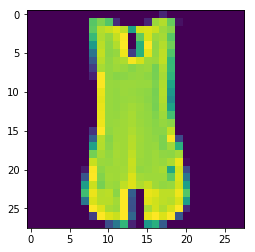

T-shirt/top


In [43]:
# Display one of the images

i = 4
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(labels[train_labels[i]])

#### Fit the model

In [52]:
# Fit the model
history = model.fit(train_images[...,np.newaxis],train_labels,epochs = 10, batch_size = 256, verbose = 2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 7s - loss: 0.3348 - accuracy: 0.8835 - mae: 4.4200
Epoch 2/10
60000/60000 - 7s - loss: 0.3264 - accuracy: 0.8863 - mae: 4.4200
Epoch 3/10
60000/60000 - 7s - loss: 0.3190 - accuracy: 0.8897 - mae: 4.4200
Epoch 4/10
60000/60000 - 7s - loss: 0.3087 - accuracy: 0.8924 - mae: 4.4200
Epoch 5/10
60000/60000 - 7s - loss: 0.3040 - accuracy: 0.8942 - mae: 4.4200
Epoch 6/10
60000/60000 - 6s - loss: 0.2984 - accuracy: 0.8956 - mae: 4.4200
Epoch 7/10
60000/60000 - 6s - loss: 0.2927 - accuracy: 0.8978 - mae: 4.4200
Epoch 8/10
60000/60000 - 6s - loss: 0.2888 - accuracy: 0.9000 - mae: 4.4200
Epoch 9/10
60000/60000 - 6s - loss: 0.2848 - accuracy: 0.9005 - mae: 4.4200
Epoch 10/10
60000/60000 - 6s - loss: 0.2808 - accuracy: 0.9014 - mae: 4.4200


#### Plot training history

In [53]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.334814,0.883517,4.420000
1,0.326369,0.886350,4.420000
2,0.319038,0.889683,4.420000
3,0.308682,0.892450,4.420000
4,0.304002,0.894150,4.419999


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

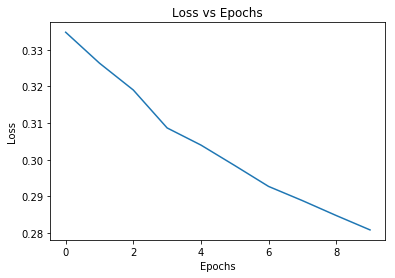

In [55]:
# Make a plot for the loss

loss_plot = df.plot(y = 'loss', title = "Loss vs Epochs", legend = False)
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

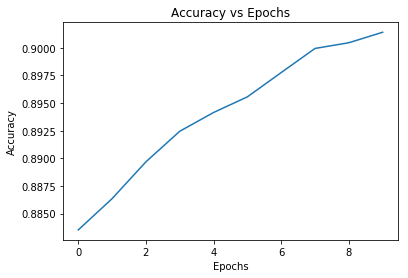

In [58]:
# Make a plot for the accuracy
acc_plot = df.plot(y = 'accuracy', title = "Accuracy vs Epochs", legend = False)
acc_plot.set(xlabel = 'Epochs', ylabel = 'Accuracy')

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

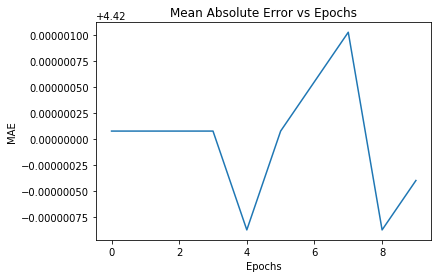

In [60]:
# Make a plot for the additional metric
mae_plot = df.plot(y = 'mae', title = "Mean Absolute Error vs Epochs", legend = False)
mae_plot.set(xlabel = 'Epochs', ylabel = 'MAE')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [57]:
# Evaluate the model
model.evaluate(test_images[...,np.newaxis],test_labels)


10000/10000 [==============================] - 1s 122us/sample - loss: 0.3096 - accuracy: 0.8923 - mae: 4.4200


[0.30960615572929384, 0.8923, 4.419997]

#### Make predictions from the model

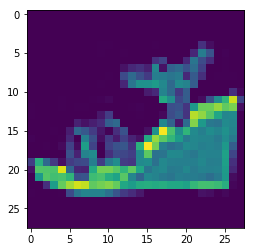

Label: Sandal


In [61]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [66]:
# Get the model predictions

pred = model.predict(test_image[np.newaxis,...,np.newaxis])
labels[np.argmax(pred)]

'Sandal'